1) Merge two lists and separate the elements into duplicates and unique values.

In [ ]:
L1 = [1,2,3,4,5,6,7]
L2 = [2,3,4,8,9,10]
L4 = []
L5 = []

L3 = L1+L2
for i in L3:
  if L3.count(i) > 1:
    if i not in L4:
     L4.append(i)
  else:
    L5.append(i)
print(L4)
print(L5)

[2, 3, 4]
[1, 5, 6, 7, 8, 9, 10]


2) Dataframe Question

In [ ]:
import pandas as pd

# Sample data for d1 and d2
data1 = {
    'employee name': ['Alice', 'Bob', 'Alice'],
    'years worked': ['2012-2013', '2014-2015', '2015-2016'],
    'company worked for': ['Company A', 'Company B', 'Company C']
}

data2 = {
    'employee name': ['Alice', 'Bob', 'Charlie'],
    'years worked': ['2012-2013', '2014-2015', '2016-2017'],
    'previous company worked for': ['Company D', 'Company E', 'Company F']
}

# Create dataframes
d1 = pd.DataFrame(data1)
d2 = pd.DataFrame(data2)

# Combine the two dataframes
combined = pd.concat([
    d1.rename(columns={'company worked for': 'companies worked for'}),
    d2.rename(columns={'previous company worked for': 'companies worked for'})
])

# Group by employee name and aggregate the data
result = combined.groupby('employee name').agg(
    no_of_years_exp=('years worked', lambda x: len(set(x))),
    companies_worked_for=('companies worked for', lambda x: ', '.join(set(x)))
).reset_index()

# Display the result
print(result)

  employee name  no_of_years_exp             companies_worked_for
0         Alice                2  Company C, Company D, Company A
1           Bob                1             Company B, Company E
2       Charlie                1                        Company F


In [ ]:
combined

,employee name,years worked,companies worked for
0,Alice,2012-2013,Company A
1,Bob,2014-2015,Company B
2,Alice,2015-2016,Company C
0,Alice,2012-2013,Company D
1,Bob,2014-2015,Company E
2,Charlie,2016-2017,Company F


3) To remove duplicates from the dataframe?

In [ ]:
d1.drop_duplicates(subset=None, keep='first', inplace=False)

,employee name,years worked,company worked for
0,Alice,2012-2013,Company A
1,Bob,2014-2015,Company B
2,Alice,2015-2016,Company C


4) Given an integer array nums where some elements appear twice and others appear once, return an array of all the duplicates. You must write a solution with a linear runtime complexity.

In [ ]:
def findDuplicates(nums):
    res = []
    for num in nums:
        if nums[abs(num) - 1] < 0:
            res.append(abs(num))
        else:
            nums[abs(num) - 1] *= -1
    return res

nums = [4, 3, 2, 7, 8, 2, 3, 1]
print(findDuplicates(nums))  # Output: [2, 3]

[2, 3]


In [ ]:
def findDuplicates(nums):
    res = []
    for num in set(nums):  # Use set to avoid checking the same number multiple times
        if nums.count(num) > 1:  # Check if the number appears more than once
            res.append(num)
    return res

nums = [4, 3, 2, 7, 8, 2, 3, 1]
print(findDuplicates(nums))  # Output: [2, 3]

[2, 3]


5) Given a sorted array nums, remove the duplicates in place such that each element appears only once and return the new length of the array.

In [ ]:
def removeDuplicates(nums):
    unique_nums = sorted(set(nums))  # Get unique elements and sort them
    nums[:len(unique_nums)] = unique_nums  # Update nums in place
    return len(unique_nums)

nums = [0, 0, 1, 1, 1, 2, 2, 3, 3, 4]
print(removeDuplicates(nums))  # Output: 5
print(nums[:5])  # nums[:5] reflects the unique elements: [0, 1, 2, 3, 4]

5
[0, 1, 2, 3, 4]


In [ ]:
l1 = [0, 0, 1, 1, 1, 2, 2, 3, 3, 4]
l1 = sorted(list(set(l1)))
print(l1, len(l1))

[0, 1, 2, 3, 4] 5


In [ ]:
def removeDuplicates(nums):
    j = 0
    for i in range(1, len(nums)):
        if nums[i] != nums[j]:
            j += 1
            nums[j] = nums[i]
    return j + 1

nums = [0, 0, 1, 1, 1, 2, 2, 3, 3, 4]
print(removeDuplicates(nums))  # Output: 5
print(nums[:5])  # Output: [0, 1, 2, 3, 4]

5
[0, 1, 2, 3, 4]


In [ ]:
def removeDuplicates(nums):
    unique_nums = []  # Initialize an empty list to store unique elements
    for i in nums:
        if i not in unique_nums:  # Check if the current element is not already in the list
            unique_nums.append(i)  # Append the unique element
    print(len(unique_nums), unique_nums)   # Return the length and the unique list

nums = [0, 0, 1, 1, 1, 2, 2, 3, 3, 4]
removeDuplicates(nums)

5 [0, 1, 2, 3, 4]


In [ ]:
def removeDuplicates(nums):
    unique_nums = []  # Initialize an empty list to store unique elements
    for i in nums:
        if i not in unique_nums:  # Check if the current element is not already in the list
            unique_nums.append(i)  # Append the unique element
    print(len(unique_nums))  # Print the length of the unique elements
    print(unique_nums)  # Print the unique list

# Take input from the user as a comma-separated string of numbers
nums = list(input("Enter a list of numbers separated by commas: ").split(','))
removeDuplicates(nums)

Enter a list of numbers separated by commas: 1,1,3,6,99
4
['1', '3', '6', '99']


6) Given an array of strings, group the anagrams together. You can return the answer in any order.

Example Input:
strs = ["eat", "tea", "tan", "ate", "nat", "bat"]

Example Output:
[["eat", "tea", "ate"], ["tan", "nat"], ["bat"]]

In [ ]:
def groupAnagrams(strs):
    anagrams = {}
    for word in strs:
        sorted_word = ''.join(sorted(word))
        if sorted_word in anagrams:
            anagrams[sorted_word].append(word)
        else:
            anagrams[sorted_word] = [word]
    return list(anagrams.values())

strs = ["eat", "tea", "tan", "ate", "nat", "bat"]
print(groupAnagrams(strs))  # Output: [["eat", "tea", "ate"], ["tan", "nat"], ["bat"]]

[['eat', 'tea', 'ate'], ['tan', 'nat'], ['bat']]


In [ ]:
def groupAnagrams(strs):
    anagrams = {}
    for i in strs:
        sorted_word = ''.join(sorted(i))
        if sorted_word in anagrams:
            anagrams[sorted_word].append(i)
        else:
            anagrams[sorted_word] = [i]
    return list(anagrams.values())

strs = ["eat", "tea", "tan", "ate", "nat", "bat"]
print(groupAnagrams(strs))  # Output: [["eat", "tea", "ate"], ["tan", "nat"], ["bat"]]

[['eat', 'tea', 'ate'], ['tan', 'nat'], ['bat']]


In [ ]:
strs = ["eat", "tea", "tan", "ate", "nat", "bat"]
for i in strs:
  sorted_word = ''.join(sorted(i))
  print(sorted_word)

aet
aet
ant
aet
ant
abt


7) Given two integer arrays nums1 and nums2, return an array of their intersection. Each element in the result must be unique.

In [ ]:
def intersection(nums1, nums2):
    return list(set(nums1) & set(nums2))

nums1 = [4, 9, 5]
nums2 = [9, 4, 9, 8, 4]
print(intersection(nums1, nums2))  # Output: [4, 9]

[9, 4]


8) Question: You have two datasets:

df1: Contains Employee ID, Name, and Salary.

df2: Contains Employee ID, Department, and Location.

You need to merge both datasets on the Employee ID column to get a new dataset with all the information combined.

In [ ]:
import pandas as pd

# Sample dataframes
df1 = pd.DataFrame({
    'Employee ID': [1, 2, 3, 4],
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Salary': [50000, 60000, 55000, 45000]
})

df2 = pd.DataFrame({
    'Employee ID': [1, 2, 3, 5],
    'Department': ['HR', 'Finance', 'Engineering', 'Marketing'],
    'Location': ['New York', 'London', 'San Francisco', 'Berlin']
})

# Merge dataframes on 'Employee ID'
merged_df = pd.merge(df1, df2, on='Employee ID', how='left')
print(merged_df)

   Employee ID     Name  Salary   Department       Location
0            1    Alice   50000           HR       New York
1            2      Bob   60000      Finance         London
2            3  Charlie   55000  Engineering  San Francisco
3            4    David   45000          NaN            NaN


9) You have a dataset of Sales with the columns Date, Product, and Revenue. You need to calculate the total revenue by Product for each month.

In [ ]:
import pandas as pd

# Sample sales data
df = pd.DataFrame({
    'Date': ['2022-01-15', '2022-01-16', '2022-02-17', '2022-02-18', '2022-03-19'],
    'Product': ['A', 'B', 'A', 'B', 'A'],
    'Revenue': [500, 300, 400, 350, 600]
})

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the month and year from 'Date'
df['Month'] = df['Date'].dt.to_period('M')

# Group by 'Month' and 'Product' and calculate the sum of 'Revenue'
revenue_by_product = df.groupby(['Month', 'Product'])['Revenue'].sum().reset_index()
print(revenue_by_product)

     Month Product  Revenue
0  2022-01       A      500
1  2022-01       B      300
2  2022-02       A      400
3  2022-02       B      350
4  2022-03       A      600


The ***dt.to_period('M')*** method in Pandas is used to convert a datetime column into a Period object representing the month or another specified frequency. This is useful when you want to group data by a specific time period, such as months or years, and work with a more abstract representation of time that focuses on that period rather than individual dates.

More examples of period conversion with dt.to_period():

'D': Daily period.

'M': Monthly period.

'Q': Quarterly period.

'A': Annual period (Yearly).

'H': Hourly period.

The ***reset_index()*** method in Pandas is used to reset the index of a DataFrame. When you perform operations like groupby(), sort_values(), or other manipulations that change the structure of the DataFrame, the index might become non-sequential or multi-level. The reset_index() method restores the index back to the default integer index, starting from 0.

In [ ]:
df['Date']
df['Month']

,Month
0,2022-01
1,2022-01
2,2022-02
3,2022-02
4,2022-03


10) How to extract only the month from the dataset?

In [ ]:
import pandas as pd

# Sample sales data
df = pd.DataFrame({
    'Date': ['2022-01-15', '2022-01-16', '2022-02-17', '2022-02-18', '2022-03-19'],
    'Product': ['A', 'B', 'A', 'B', 'A'],
    'Revenue': [500, 300, 400, 350, 600]
})

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])
# Extract the month from 'Date'
df['Month'] = df['Date'].dt.month
print(df[['Month']])

   Month
0      1
1      1
2      2
3      2
4      3


11) Handling Missing Data

Question: You have a dataset with missing values in some columns. You need to replace the missing values in the Salary column with the average salary and fill the missing values in the Department column with "Not Available".

In [ ]:
import pandas as pd

# Sample dataframe with missing values
data = pd.DataFrame({
    'Employee ID': [1, 2, 3, 4],
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Salary': [50000, None, 55000, None],
    'Department': ['HR', 'Finance', None, 'Engineering']
})

# Fill missing values
data['Salary'] = data['Salary'].fillna(data['Salary'].mean())
data['Department'] = data['Department'].fillna('Not Available')

print(data)

   Employee ID     Name   Salary     Department
0            1    Alice  50000.0             HR
1            2      Bob  52500.0        Finance
2            3  Charlie  55000.0  Not Available
3            4    David  52500.0    Engineering


12) Removing Duplicates

You have a dataset with duplicate rows, and you want to remove the duplicates based on the Employee ID while keeping the first occurrence.

In [ ]:
import pandas as pd

# Sample dataframe with duplicates
data = pd.DataFrame({
    'Employee ID': [1, 2, 2, 3, 4, 4],
    'Name': ['Alice', 'Bob', 'Bob', 'Charlie', 'David', 'David'],
    'Salary': [50000, 60000, 60000, 55000, 45000, 45000]
})

# Remove duplicates based on 'Employee ID', keep the first occurrence
data_unique = data.drop_duplicates(subset='Employee ID', keep='first')
print(data_unique)

   Employee ID     Name  Salary
0            1    Alice   50000
1            2      Bob   60000
3            3  Charlie   55000
4            4    David   45000


drop_duplicates() is used to remove duplicate rows based on the Employee ID column. The keep='first' argument ensures that the first occurrence of each unique Employee ID is kept.

13) Pivoting Data

Question: You have a dataset that shows sales by Product and Month. You need to pivot this data to get a table where each column represents a month, and the values show the total sales for each product.

In [ ]:
import pandas as pd

# Sample sales data
df = pd.DataFrame({
    'Product': ['A', 'B', 'A', 'B', 'A', 'B'],
    'Month': ['January', 'January', 'February', 'February', 'March', 'March'],
    'Sales': [500, 300, 400, 350, 600, 450]
})

# Pivot the data to get total sales per product for each month
pivoted_data = df.pivot_table(values='Sales', index='Product', columns='Month', aggfunc='sum', fill_value=0)
print(pivoted_data)

Month    February  January  March
Product                          
A             400      500    600
B             350      300    450


pivot_table() is used to transform the data so that the rows show products, columns represent months, and the values represent the total sales.

aggfunc='sum' ensures that the sales values are summed up for each product and month.

fill_value=0 ensures that any missing data is filled with 0.

14) Sorting Data

Question: You have a dataset of employee salaries and you need to sort the employees by their salary in descending order.

In [ ]:
import pandas as pd

# Sample employee salary data
df = pd.DataFrame({
    'Employee ID': [1, 2, 3, 4],
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Salary': [50000, 60000, 55000, 45000]
})

# Sort employees by 'Salary' in descending order
sorted_data = df.sort_values(by='Salary', ascending=False)
print(sorted_data)

   Employee ID     Name  Salary
1            2      Bob   60000
2            3  Charlie   55000
0            1    Alice   50000
3            4    David   45000


15) Valid Anagram

Problem: Given two strings s and t, return true if t is an anagram of s, and false otherwise.

In [ ]:
def isAnagram(s, t):
    return sorted(s) == sorted(t)

s = input("Enter the first string: ")
t = input("Enter the second string: ")
print(isAnagram(s, t))

Enter the first string: alab
Enter the second string: bala
True


16) Find the Missing Number

Problem: Given an array of integers nums containing n distinct numbers taken from the range 1 to n+1, find the one that is missing from the array.

In [ ]:
def findMissingNumber(nums):
    n = len(nums)
    expected_sum = (n + 1) * (n + 2) // 2  # sum of 1 to n+1
    actual_sum = sum(nums)
    return expected_sum - actual_sum

nums = list(map(int, input("Enter the numbers (space-separated): ").split()))
print(findMissingNumber(nums))

Enter the numbers (space-separated): 1 2 4 5
3


The list of numbers nums will be: [1, 2, 4, 5].

The length of the list n is 4.

The expected sum for the sequence from 1 to 5 (i.e., 1 + 2 + 3 + 4 + 5) is calculated as 15 using the formula.

The actual sum of the numbers in nums is 1 + 2 + 4 + 5 = 12.

The missing number is: 15 - 12 = 3.

17) Write a function to count the number of vowels in a string.

In [ ]:
def count_vowels(s):
    vowels = "aeiou"
    count = 0
    for i in s:
        if i.lower() in vowels:
            count = count + 1
    return count

n = input("Enter the String:")
print(count_vowels(n))

Enter the String:bala
2


18) Write a function to reverse a string without using slicing or built-in functions.

In [ ]:
def reverse_string(s):
    rev_str = ""
    for i in s:
        rev_str = i + rev_str
    return rev_str

print(reverse_string("hello"))

olleh


19) Write a function to remove duplicates from a string, keeping the order of characters intact.

In [ ]:
def remove_duplicates(s):
    result = ""
    for i in s:
        if i not in result:
            result = result + i
    return result

print(remove_duplicates("aabbcc"))

abc


20) Write a function to find the first non-repeating character in a string.

In [ ]:
def first_non_repeating(s):
    for i in s:
        if s.count(i) == 1:
            return i
    return None

print(first_non_repeating("bbaaij"))

i


21) Write a function to check if a string is a pangram (contains every letter of the alphabet at least once).

In [ ]:
def is_pangram(s):
    return set('abcdefghijklmnopqrstuvwxyz') <= set(s.lower())

print(is_pangram("The quick brown fox jumps over the lazy dog"))

True


22)  Write a function to count the number of occurrences of a specific character in a string.

In [ ]:
def count_char(s, char):
    return s.count(char)

print(count_char("hello", "l"))

2


23) Write a function to handle missing values in a pandas DataFrame.

In [ ]:
import pandas as pd

def handle_missing_data(df):
    # Fill missing values with the mean for numeric columns
    for i in df.select_dtypes(include='number').columns:
        df[i] = df[i].fillna(df[i].mean())

    # Fill missing values with the mode for categorical columns
    for i in df.select_dtypes(include='object').columns:
        df[i] = df[i].fillna(df[i].mode()[0])
    return df

# Example
data = {'A': [1, None, 3], 'B': [4, 5, None], 'C': ['X', None, 'Z']}
df = pd.DataFrame(data)
print(handle_missing_data(df))

     A    B  C
0  1.0  4.0  X
1  2.0  5.0  X
2  3.0  4.5  Z


24) Explain and demonstrate the difference between shallow copy and deepcopy with an example.

In [ ]:
import copy

original = [[1, 2], [3, 4]]  # A nested list

shallow = copy.copy(original)  # Shallow copy
deep = copy.deepcopy(original)  # Deep copy

# Modify the first element of the first nested list
original[0][0] = 99

print("Original:", original)  # [[99, 2], [3, 4]]
print("Shallow Copy:", shallow)  # [[99, 2], [3, 4]] (reflects the change)
print("Deep Copy:", deep)  # [[1, 2], [3, 4]] (remains unchanged)

Original: [[99, 2], [3, 4]]
Shallow Copy: [[99, 2], [3, 4]]
Deep Copy: [[1, 2], [3, 4]]


Shallow Copy: Reflects changes made to the original nested objects because they share the same reference.

Deep Copy: Retains the original state of the copied data and does not reflect changes made to the original, even in nested objects.

A deep copy is a completely independent copy of the original, including all nested objects.

Changes made to the original (whether to nested or outer objects) will not affect the deep copy because it does not share references with the original.

25) Explain the difference between is and == in Python

In [ ]:
a = [1, 2, 3]
b = [1, 2, 3]
print(a == b)  # True (values are the same)
print(a is b)  # False (different memory locations)

True
False


is: Compares object identity (whether two objects are the same in memory).

==: Compares object values (whether two objects have the same value).

26) Write Python code to find and visualize the correlation between columns

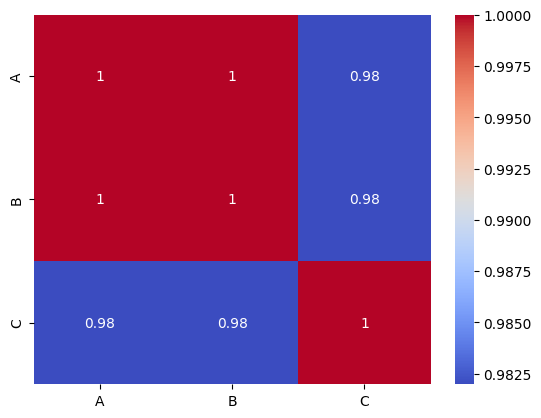

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation(df):
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.show()

# Example
data = {'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 10]}
df = pd.DataFrame(data)
plot_correlation(df)

27) You need to find the most frequent element in a large list of numbers. How would you approach this?|

In [ ]:
from collections import Counter

def most_frequent_element(nums):
    counter = Counter(nums)
    return counter.most_common(1)[0][0]

# Example usage
nums = [1, 2, 3, 2, 1, 2, 4, 5, 2]
print(most_frequent_element(nums))

2


In [ ]:
from collections import Counter

def most_frequent_element(nums):
    counter = Counter(nums)
    return counter.most_common(1)

# Example usage
nums = [1, 2, 3, 2, 1, 2, 4, 5, 2]
print(most_frequent_element(nums))

[(2, 4)]


In [ ]:
from collections import Counter

def most_frequent_element(nums):
    counter = Counter(nums)
    return counter.most_common(1)

# Example usage
nums = list(map(int, input("Enter the list: ").replace(',', ' ').split()))  # Replace commas with spaces, then split
print(most_frequent_element(nums))

Enter the list: 1,2,3,4,4,4,5,6
[(4, 3)]


In [ ]:
n = list(map(int, input("Enter the list: ").replace(',', ' ').split()))
n

Enter the list: 1,2,3,4,5


[1, 2, 3, 4, 5]

In [ ]:
m = input("Enter the list: ").replace(',', ' ').split()
m

Enter the list: 1,2,3,4,5


['1', '2', '3', '4', '5']

28) You have two lists of numbers and need to find their intersection (common elements). What’s an efficient approach?

To find the intersection of two lists, converting them to sets and using the intersection() method is an efficient solution.

In [ ]:
def intersection_of_lists(list1, list2):
    return list(set(list1).intersection(set(list2)))

# Example usage
list1 = [1, 2, 3, 4, 5]
list2 = [4, 5, 6, 7, 8]
print(intersection_of_lists(list1, list2))

[4, 5]


29) Split the strings as palindrome and not palindrome into separate lists.

In [ ]:
def palin(check):
    l1 = []
    l2 = []
    for i in check:
        if i.lower() == i[::-1].lower():  # Convert to lowercase for comparison
            l1.append(i)
        else:
            l2.append(i)
    print("Palindromes:", l1)
    print("Non-Palindromes:", l2)

# Taking input as a list of strings
check = input("Enter the strings separated by spaces: ").split()
palin(check)

Enter the strings separated by spaces: Bala Radar
Palindromes: ['Radar']
Non-Palindromes: ['Bala']


30) Split the list as even and odd into separate lists.

In [ ]:
def evenodd(nums):
    l1 = []
    l2 = []
    for i in nums:
      if i % 2 == 0:
        l1.append(i)
      else:
        l2.append(i)
    print("Even:", l1)
    print("Odd:", l2)

nums = list(map(int, input("Enter the numbers:").split(",")))
evenodd(nums)

Enter the numbers:1,2,3,4,5,6,7,8,9,0
Even: [2, 4, 6, 8, 0]
Odd: [1, 3, 5, 7, 9]


31) Split the list as prime and not prime into separate lists.

In [ ]:
def prime_numbers(nums):
    primes = []
    non_primes = []
    for num in nums:
        if num < 2:
            non_primes.append(num)
        else:
            for i in range(2, num):
                if num % i == 0:
                    non_primes.append(num)
                    break
            else:
                primes.append(num)
    print("Primes:", primes)
    print("Non-primes:", non_primes)

nums = list(map(int, input("Enter the numbers separated by commas: ").split(",")))
prime_numbers(nums)

Enter the numbers separated by commas: 1,2,3,4,5,6,7,8,9
Primes: [2, 3, 5, 7]
Non-primes: [1, 4, 6, 8, 9]


32) Factorial

In [ ]:
def factorial(num):
    a = 1
    for i in range(1, num + 1):
        a = a * i
    print("Factorial:", a)

num = int(input("Enter a number: "))
factorial(num)

Enter a number: 5
Factorial: 120


33) Anagram Check

In [ ]:
def anagram_check(str1, str2):
    if sorted(str1.lower()) == sorted(str2.lower()):
        print(f"'{str1}' and '{str2}' are anagrams.")
    else:
        print(f"'{str1}' and '{str2}' are not anagrams.")

str1 = input("Enter the first string: ")
str2 = input("Enter the second string: ")
anagram_check(str1, str2)

Enter the first string: Bala
Enter the second string: alab
'Bala' and 'alab' are anagrams.


34) Sum of digits

In [ ]:
def sum_of_digits(num):
    digit_sum = sum(int(i) for i in str(num))
    print("Sum of digits:", digit_sum)

num = int(input("Enter a number: "))
sum_of_digits(num)

Enter a number: 1234
Sum of digits: 10


35) Write a function that counts the number of vowels and consonants in a given string.

In [ ]:
def count_vowels_consonants(s):
    vowels = "aeiou"
    vowel_count  = 0
    consonant_count = 0
    for i in s.lower():
        if i in vowels:
            vowel_count += 1
        elif i.isalpha():
            consonant_count += 1
    print(f"Vowels: {vowel_count}, Consonants: {consonant_count}")

s = input("Enter a string: ")
count_vowels_consonants(s)

Enter a string: bala12
Vowels: 2, Consonants: 2


In [ ]:
def count_vowels_consonants(s):
    vowels = "aeiou"
    vowel_count  = 0
    consonant_count = 0
    for i in s.lower():
        if i in vowels:
            vowel_count += 1
        else:
            consonant_count += 1
    print(f"Vowels: {vowel_count}, Consonants: {consonant_count}")

s = input("Enter a string: ")
count_vowels_consonants(s)

Enter a string: bala12
Vowels: 2, Consonants: 4


36) Write a function that finds and returns the duplicate elements from a given list

In [ ]:
def find_duplicates(nums):
    unique = set()
    duplicates = set()
    for i in nums:
        if i in unique:
            duplicates.add(i)
        else:
            unique.add(i)
    print("Duplicates:", list(duplicates))
    print("unique:", list(unique))

nums = list(map(int, input("Enter the numbers separated by commas: ").split(",")))
find_duplicates(nums)

Enter the numbers separated by commas: 1,2,3,4,5,5,6,6,7,7,8
Duplicates: [5, 6, 7]
unique: [1, 2, 3, 4, 5, 6, 7, 8]


37) Count the number of characters that are not spaces

In [ ]:
def count_letters(sentence):
    count = 0
    for i in sentence:
        if i.isalpha():  # Check if the character is a letter
            count = count + 1
    print("Number of letters:", count)

sentence = input("Enter a sentence: ")
count_letters(sentence)

Enter a sentence: Bala is a good boy
Number of letters: 14


38) Find the Common Elements Between Two Lists

In [ ]:
def common_elements(list1, list2):
    return list(set(list1) & set(list2))

list1 = list(map(int, input("Enter first list of numbers: ").split()))
list2 = list(map(int, input("Enter second list of numbers: ").split()))
print("Common elements:", common_elements(list1, list2))

Enter first list of numbers: 1 2 3 4 5 5
Enter second list of numbers: 1 2 3 6 7 8
Common elements: [1, 2, 3]


39) Find the second largest number in a list of integers

In [ ]:
def largest(nums):
  nums = list(set(nums))
  nums.sort()
  if len(nums) > 2:
    return nums[-2]
  return None

nums = list(map(int, input("Enter the numbers separated by commas: ").split(",")))
num = largest(nums)
print(num)

Enter the numbers separated by commas: 9,8,22,308,109
109


40) Reverse the words in a sentence, keeping the order of characters in each word

In [ ]:
def reverse_words(sentence):
    words = sentence.split()
    return ' '.join(reversed(words))

sentence = input("Enter a sentence: ")
print("Reversed sentence:", reverse_words(sentence))

Enter a sentence: Bala is a good boy
Reversed sentence: boy good a is Bala


In [ ]:
def countt(words):
  vowels = "aieou"
  v = []
  c = []
  for i in words:
    if i.lower() in vowels:
      v.append(i)
    else:
      c.append(i)
  print("Vowels:", v)
  print("Vowels:", len(v))
  print("Consonants:", c)
  print("Vowels:", len(c))

words = input("Enter the words: ").split()
countt(words)

Enter the words: bala is a good boy
Vowels: ['a']
Vowels: 1
Consonants: ['bala', 'is', 'good', 'boy']
Vowels: 4


In [ ]:
def countt(sentence):
    vowels = "aeiou"
    v = []
    c = []
    for i in sentence:  # Iterate through each character
        if i.isalpha():  # Check if the character is a letter
            if i.lower() in vowels:
                v.append(i)
            else:
                c.append(i)
    print("Vowels:", v)
    print("Number of Vowels:", len(v))
    print("Consonants:", c)
    print("Number of Consonants:", len(c))

# Input
sentence = input("Enter the sentence: ")
countt(sentence)

Enter the sentence: bala is a good boy
Vowels: ['a', 'a', 'i', 'a', 'o', 'o', 'o']
Number of Vowels: 7
Consonants: ['b', 'l', 's', 'g', 'd', 'b', 'y']
Number of Consonants: 7


41) Write a program to:

Take a sentence as input from the user.

Count the number of words in the sentence.

Ignore special characters (e.g., punctuation like .,!?) and count only alphanumeric words.

In [ ]:
import re

def count_words(sentence):
    # Remove special characters and keep only words
    words = re.findall(r'\b\w+\b', sentence)  # \b\w+\b matches whole alphanumeric words
    return len(words)

# Example usage
sentence = input("Enter a sentence: ")
word_count = count_words(sentence)
print("Word count:", word_count)

Enter a sentence: Hello, world! How are you doing?
Word count: 6


42) Write a program that:

Takes a sentence as input from the user.

Finds the longest word in the sentence.

Prints the longest word and its length.

In [ ]:
import re
def counts(sent):
    word = re.findall(r'\b\w+\b', sent)
    longest_word = max(word, key=len)
    return longest_word, len(longest_word)

sent = input("Enter the sentence: ")
counts(sent)

Enter the sentence: Bala is an exceptionally good boy


('exceptionally', 13)

43) Write a program that:

Takes two strings as input from the user.

Checks if the strings are anagrams of each other (contain the same characters in any order).

Prints whether they are anagrams or not.

In [ ]:
def anag(strn1, strn2):
  if sorted(strn1.lower()) == sorted(strn2.lower()):
    print(f"'{strn1}' and '{strn2}' are anagrams.")
  else:
    print("Not an anagram")

strn1 = input("Enter the 1st word:")
strn2 = input("Enter the 2nd word:")
anag(strn1, strn2)

Enter the 1st word:Bala
Enter the 2nd word:alab
'Bala' and 'alab' are anagrams.


44) Write a program that:

Takes a string as input from the user.

Counts how many times each character (excluding spaces) appears in the string.

Prints the characters and their respective counts in the string.

In [ ]:
from collections import Counter
def word_count(sens):
    sens = sens.replace(" ", "")  # Exclude spaces
    count = Counter(sens)
    for char, freq in count.items():
        print(f"Character: {char} -> {freq} times")

sens = input("Enter the sentence: ")
word_count(sens)

Enter the sentence: Bala is an exceptionally good boy
Character: B -> 1 times
Character: a -> 4 times
Character: l -> 3 times
Character: i -> 2 times
Character: s -> 1 times
Character: n -> 2 times
Character: e -> 2 times
Character: x -> 1 times
Character: c -> 1 times
Character: p -> 1 times
Character: t -> 1 times
Character: o -> 4 times
Character: y -> 2 times
Character: g -> 1 times
Character: d -> 1 times
Character: b -> 1 times


45) Write a program that:

Takes a sentence as input from the user.

Finds the longest word in the sentence.

Prints the longest word. If there are multiple words with the same length, print all of the

In [ ]:
def longest_word(sentence):
    words = sentence.split()  # Split the sentence into words
    longest = max(words, key=len)  # Find the longest word
    max_len = len(longest)  # Get the length of the longest word

    # Find all words that have the same length as the longest
    longest_words = [i for i in words if len(i) == max_len]

    print("Longest word(s):", ", ".join(longest_words))

# Get input from the user
sentence = input("Enter the sentence: ")
longest_word(sentence)

Enter the sentence: Bala is an exceptionally exceptionally good boy
Longest word(s): exceptionally, exceptionally


46) Check if a String is a Palindrome

Write a program that:

Takes a string as input from the user.

Checks if the string is a palindrome (i.e., reads the same forward and backward).

Prints True if it’s a palindrome, and False otherwise.

In [ ]:
def palin(stri):
  if stri.lower() == stri[::-1].lower():
    print("True")
  else:
    print("False")

stri = input("Enter the string:")
palin(stri)

Enter the string:Radar
True


47) Write a program that:

Takes a string as input from the user.

Removes all duplicate characters while maintaining the order of their first occurrence.

In [ ]:
def remove_duplicates(stri):
    result = ""
    seen = set()
    for i in stri:
        if i not in seen:
            result = result + i  # Add the character to the result
            seen.add(i)  # Add the character to the set
    return result

stri = input("Enter the string: ")
print("String after removing duplicates:", remove_duplicates(stri))

Enter the string: Bala
String after removing duplicates: Bal


In [ ]:
def rev(stri):
  return stri[::-1]

stri = input("Enter the string: ")
print("Reversed string:", rev(stri))

Enter the string: Bala, hi
Reversed string: ih ,alaB


In [ ]:
def rev_words(stri):
    words = stri.split()  # Split the string into a list of words
    reversed_words = []  # List to store the reversed words
    for word in words:
        reversed_words.append(word[::-1])  # Reverse each word and add to the list
    return ' '.join(reversed_words)  # Join the reversed words back into a string

stri = input("Enter the string: ")
print("Reversed words:", rev_words(stri))

Enter the string: Bala, hi
Reversed words: ,alaB ih


48) Sorting a list in descending order using bubble sort

In [ ]:
def bubble_sort_descending(nums):
    n = len(nums)  # Find the number of elements in the list
    # We will repeat the sorting process for each item
    for i in range(n):
        # Compare adjacent items and swap if the earlier one is smaller than the later one
        for j in range(0, n-i-1):  # The last elements are already sorted
            if nums[j] < nums[j+1]:  # If the current item is smaller than the next item
                # Swap them to put the larger one first
                nums[j], nums[j+1] = nums[j+1], nums[j]
    return nums

# Input from the user (e.g., "1 3 5 2 4")
nums = list(map(int, input("Enter the numbers: ").split()))
# Call the bubble sort function to sort in descending order
print("Sorted in descending order:", bubble_sort_descending(nums))

Enter the numbers: 1 5 6 3 8 9
Sorted in descending order: [9, 8, 6, 5, 3, 1]


In [ ]:
nums = 1, 5, 6, 3, 8, 9
n = len(nums)
n

6

49) Write a Python program to merge two sorted lists into one sorted list

In [ ]:
list1 = [1, 3, 5, 7]
list2 = [2, 4, 6, 8]

l = sorted(list1 + list2)
print(l)

[1, 2, 3, 4, 5, 6, 7, 8]


In [ ]:
list1 = [1, 3, 5, 7]
list2 = [2, 4, 6, 8]

l = list1 + list2
print(l)

[1, 3, 5, 7, 2, 4, 6, 8]


In [ ]:
def maxi(sentence):
    words = sentence.split()
    longest_word = max(words, key=len)
    print("Longest word:", longest_word)

sentence = input("Enter the sentence: ")
maxi(sentence)

Enter the sentence: Bala is a good boy
Longest word: Bala


50) Write a Python program to calculate the sum of all numbers in a string.

For example:

Input: "abc12def34gh5"

Output: 51

In [ ]:
def check(stringg):
    digits = []
    for i in stringg:
        if i.isdigit():
            digits.append(int(i))  # Convert the digit to an integer and append it to the list
    if digits:  # Check if there are any digits
        print("Sum of digits:", sum(digits))  # Print the sum of digits
    else:
        print("No digits found in the string.")

stringg = input("Enter the string: ")
check(stringg)

Enter the string: bal123
Sum of digits: 6


51) Write a program that accepts a string from the user and returns the number of uppercase and lowercase letters in the string. Ignore non-alphabetic characters (like spaces, numbers, and punctuation).

In [ ]:
def check(stringg):
    upper = []
    lower = []
    for i in stringg:
        if i.isalpha():
            if i.isupper():
                upper.append(i)  # Add uppercase letter to the list
            else:
                lower.append(i)  # Add lowercase letter to the list
    print("Uppercase letters:", len(upper))  # Count uppercase letters
    print("Lowercase letters:", len(lower))  # Count lowercase letters

stringg = input("Enter the string: ")
check(stringg)

Enter the string: BB#$%alA
Uppercase letters: 3
Lowercase letters: 2
